# Create Initial Conditions That Result in Spiral Defect Chaos
Tim Tyree<br>
6.8.2020

In [48]:
#pylab
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pylab import imshow, show

import skimage as sk
from skimage import measure, filters

import matplotlib.pyplot as plt, numpy as np, os
from numba import njit, jit, vectorize
from PIL import Image
import imageio
# import cv2 as cv

#automate the boring stuff
from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
width = 512
height = 512
channel_no = 3

#load the libraries
from lib import *
# from lib.operari import *
# from lib.ProgressBar import *
# from lib.minimal_model import *
# from lib.TexturePlot import *
# from lib.get_tips import *
# from lib.intersection import *
#TODO: use cuda via numba
# from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
# from lib.contours_to_tips import *

%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


# create a 512x512x3 initial condition that's well controlled and produces SDC

## create a 'time origin' in a simple, controlled way
create a uniform, horizontal stimulus, then time step up to time = 100, at time steps of h = 0.01.  Record.

In [2]:
# make the relevant initial texture
txt = np.zeros((512,512,3))
zero_txt = txt.copy()
txt[256-32:256+32,:,0] = 0.5
txt[...,1] = 0.5
txt[...,2] = 0.5
tme = 0

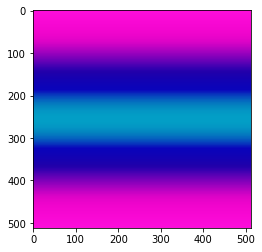

In [22]:
plt.imshow(txt)

In [20]:
h = 0.01
nsteps = 10**4
for step in range(nsteps):
    time_step(texture=txt, h = 0.01, zero_txt=zero_txt)
    tme += h
    printProgressBar(step + 1, nsteps, prefix = 'Progress:', suffix = 'Complete', length = 50)
beep(1)
print(f"the time is tme = {tme}.")

Progress: |██████████████████████████████████████████████████| 100.0% Complete
the time is tme = 100.00000000001425.


In [30]:
save_fn = f"ic_{txt.shape[1]}x{txt.shape[0]}_t={0}.npz"
print(save_fn)
np.savez_compressed(f'{nb_dir}/Data/{save_fn}', txt)

ic_512x512_t=0.npz


## added a semicircle of stimulus tilted at 45º in the danger zone
- Then confirm that spiral defect chaos commenses

## load test cases for pbc

In [3]:
data_dir = f'{nb_dir}/Data/ic_512x512_t=0.npz'
txt = np.load(data_dir)['arr_0']

100000


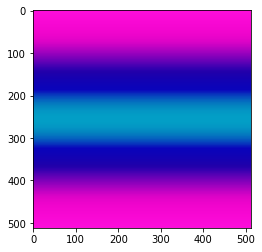

In [141]:
plt.imshow(txt)

# DONE: add a semicircle of stimulus tilted at 45º in the danger zone
- Then confirm that spiral defect chaos commenses

100000


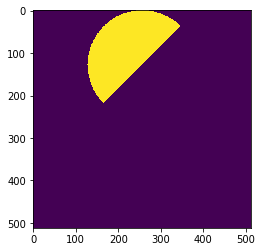

In [142]:
#make initialization conditions
deg = 45
x0 = 512/2
y0 = 512/4

#make the initialization mesh
img = 0*txt[...,0].copy()
color_left_of_line(out=img, x0=x0, y0=y0, deg = deg, value=1.)  #make left of line mesh 0 or 1
color_outside_range(out=img, x0=x0,y0=y0,r=64*2, val=0.0)  #make circle mesh 0 or 1
#already done: hadamard product of the two.

plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


100000


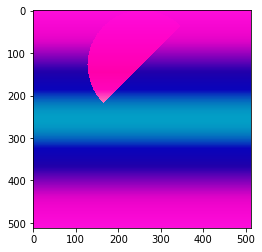

In [151]:
# save this init + the origin
out = txt.copy()
out[...,0] += 10.*img
plt.imshow(out)

In [152]:
save_dir = nb_dir+f'/Data/ic_deg_{deg}_0'
np.save(save_dir+f'.npy', arr=out)
np.savez_compressed(save_dir+f'.npz', arr=out)

In [150]:
save_dir


'/Users/timothytyree/Documents/GitHub/care/notebooks/Data/ic_deg_45_0'

## off topic: get method from trimesh used to calculate volume

In [139]:

# from skimage import draw

# circle_coords = draw.circle(r=100, c=100, radius=100, shape=(512,512,3))
# txt[circle_coords]


# compute initial point and final point of line that goes through the circle's center
# r0 = 0; c0 = xm - dst
# r1 = txt.shape[1]-1; c1 = xm + dsb
# draw that circle
# line = draw.line(r0, c0, r1, c1)

# ym = 512/4; xm = 512/2; #same as circle center
# deg   = 45 # number of degrees semicircle is cut by
# theta = deg/180*np.pi

# #dist to top
# dtt = ym
# #dist to bottom
# dtb = txt.shape[1]-ym-1
# #use trig to get dist to sides
# dst = int(np.around(np.tan(theta)*dtt))
# dsb = int(np.around(np.tan(theta)*dtb))


# img = 0*txt[...,0].copy()
# line_x = line[0]
# color_within_range(x0=512/2,y0=512/4,r=100, out=img, val=10., width=512,height=512)


In [286]:
!pip3 install trimesh

     |████████████████████████████████| 614 kB 2.3 MB/s eta 0:00:01


In [337]:
import trimesh
# from lib.operari import *
# import inspect

In [338]:
file_name = 'ic_600x600.101.npz'
file_dir = find_files(file_name, search_path=nb_dir)
if len(file_dir)==0: raise('file not found')
# print(
file_dir=file_dir[0]
# )
# print(sys.path.exists(file_dir))

In [339]:
# generate load_mesh from .npz array
txt = np.load(file_dir)['arr_0']

In [340]:
# #make a log folder
make_log_folder(folder_name='Data/log-tmp/')

^that folder probs existed already.


In [341]:
# print(inspect.getsource(trimesh.creation.faces_to_edges))

def faces_to_edges(faces, return_index=False):
    """
    Given a list of faces (n,3), return a list of edges (n*3,2)

    Parameters
    -----------
    faces : (n, 3) int
      Vertex indices representing faces

    Returns
    -----------
    edges : (n*3, 2) int
      Vertex indices representing edges
    """
    faces = np.asanyarray(faces)

    # each face has three edges
    edges = faces[:, [0, 1, 1, 2, 2, 0]].reshape((-1, 2))

    if return_index:
        # edges are in order of faces due to reshape
        face_index = np.tile(np.arange(len(faces)),
                             (3, 1)).T.reshape(-1)
        return edges, face_index
    return edges



trimesh.base.Trimesh

In [347]:
# print(inspect.getsource(trimesh.Trimesh.))
#     trimesh.Trimesh.mass_properties
trimesh.Trimesh.volume

In [ ]:
trimesh.

# move the computational geometry ipynbs and lib from rapids-notebook/'trimesh work' over here to python/notebooks/
Done on UB

## distractions

### TODO(when bored & w/ time): test trimesh.Trimesh.area and trimesh.Trimesh.volume can reproduce the right ratio for a sphere.

### TODO: What sized cube yields a unit volume output? Hint: what's the volume for a right tetrahedron?

### (and then) TODO: find out this "surface integral" that functionaly produces the volume of a watertight triangular mesh

# partition WJ's 600x600 ic into nine 200x200 patches. save
each patch is 5cm x 5 cm<br>
6.23.2020


In [4]:
input_fn = search_for_file()

File: /Users/timothytyree/Documents/GitHub/care/notebooks/Data/ic_600x600.101.npz


In [5]:
txt = load_buffer(input_fn)

In [9]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.11.npz'
txt_out = txt[0:200,0:200]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

(200, 200, 3)


In [11]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.12.npz'
txt_out = txt[200:400,0:200]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

(200, 200, 3)


In [13]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.13.npz'
txt_out = txt[400:600,0:200]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

(200, 200, 3)


In [17]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.21.npz'
txt_out = txt[0:200,200:400]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

(200, 200, 3)


In [18]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.22.npz'
txt_out = txt[200:400,200:400]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

(200, 200, 3)


In [19]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.23.npz'
txt_out = txt[400:600,200:400]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

(200, 200, 3)


In [20]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.31.npz'
txt_out = txt[0:200,400:600]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

(200, 200, 3)


In [21]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.32.npz'
txt_out = txt[200:400,400:600]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

(200, 200, 3)


In [22]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.33.npz'
txt_out = txt[400:600,400:600]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

(200, 200, 3)


# file IO method that compresses numpy arrays.  
8.13.2020
- TODO: see whether this compressed array format can store 3 channels of float instances at each pixel

In [157]:
class IC_File(object):
    r"""Describe the class"""
    def __init__(self, folder, file_name):
        os.chdir(folder)
        f= open(file_name,"ab") #write to binary file: 'wb' ) )
        data = read_array(f)
        self.data = data
        # for i in range(10):
        #   f.write("This is line %d\r\n" % (i+1))
        f.close()
        self.folder = folder
        self.file_name = file_name
        
        self.width = None
        self.height= None
        self.xres = None
        self.yres = None
        
    def shape(self):
        return np.array((self.width,self.height), dtype=np.int)
    def area(self):
        shape = self.shape()
        da = self.xres()*self.yres()
        return da*shape[0]*shape[1]
    
def compress_array(array, save_file='data.pkl.lzma'):
    '''array is a numpy array.'''
    import pickle, gzip, lzma, bz2
    data = array
    # pickle.dump( data, gzip.open( 'data.pkl.gz',   'wb' ) ) # inferior to lzma
    pickle.dump( data, lzma.open( save_file, 'wb' ) )
    # pickle.dump( data,  bz2.open( 'data.pkl.bz2',  'wb' ) ) # inferior to lzma
    
def append_array(array, save_file='data.pkl.lzma'):
    '''array is a numpy array.'''
    import pickle, gzip, lzma, bz2
    data = array
    # pickle.dump( data, gzip.open( 'data.pkl.gz',   'wb' ) ) # inferior to lzma
#     pickle.dump( data, lzma.open( save_file, 'ab' ) ) # slightly smaller file size
    pickle.dump( data,  bz2.open( 'data.pkl.bz2',  'wb' ) ) # better loading speed for non-random numpy arrays

In [158]:
!pip install hickle

In [2]:
#consider using a hdf5 file structure to efficiently store numpy arrays using hickle!
import hickle as hkl 

data = { 'name' : 'test', 'data_arr' : [1, 2, 3, 4] }

# Dump data to file
hkl.dump( data, 'new_data_file.hkl' )

# Load data from file
data2 = hkl.load( 'new_data_file.hkl' )

print( data == data2 )

int

There also is the possibility to "pickle" directly into a compressed archive by doing:

In [6]:
folder = fi

/Users/timothytyree/Documents/GitHub/care/notebooks


# TODO: use dask to load/write these files (check chrome!)

# partition WJ's 600x600 ic into nine 200x200 patches. save
each patch is 5cm x 5 cm<br>
6.23.2020


In [155]:
# def load_fortran(input_fn):
#     #load txt
#     arr = np.loadtxt(input_fn)
#     #WJ's files come to 16 digits of machine precision.
#     arr = arr.astype(dtype = np.float64, casting='same_kind', order='C', copy=False)

#     N = arr.shape[0]
#     n = np.sqrt(N)
#     if not n == np.int(n):
#         raise Exception('Error: Input array is not a square matrix!')
#     n = int(n)
#     arr = arr.reshape(n,n,arr.shape[-1], order='C')
#     return arr

In [117]:
# def _precision(arr):
#     val = arr[0,0]
#     return ( precision := len(str(val))-2 )
# def _dtype(arr):
#     val = arr[0,0]
#     return ( dtype := type(val) )

In [41]:
input_fn = search_for_file()

File: /Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ic-wj/ic_600x600.122


In [119]:
#TODO: test that the input_fn is given as the absolute file path and fix it if it isn't
base_folder = '/'+os.path.join(*input_fn.split('/')[:-2])#+'/ds_5_param_set_8/trajectories/'


precision = _precision(arr)
dtype = _dtype(arr)

# val = arr[0,0]
# arr = arr.astype(dtype = np.float16, casting='same_kind', order='F', copy=False)

os.chdir(tmp_folder)
tmp_fn = file_name+'.npz'
# np.savez_compressed(tmp_fn,arr)
# txt = load_buffer(tmp_fn)
txt = arr

# sub_id = 33
# initial_condition_dir = nb_dir + f'/Data/initial-conditions/ic_200x200.101.{sub_id}.npz'
tip_position_dir = tip_log_dir.replace('.csv','_processed.csv')
save_folder_traj = '/'+os.path.join(*initial_condition_dir.split('/')[:-2])+'/ds_5_param_set_8/trajectories/'
birth_death_dir = '/'.join(save_folder_traj.split('/')[:-2])+'/birth-death-rates'


In [132]:
# def chunk_600x600_into_ninths(txt,file_name, save_folder):
#     '''suppose file_name is a bare string with no extension such as ".npz"
#     suppose txt is a numpy array that is (600,600,The_Rest)
#     '''
#     os.chdir(save_folder)
#     save_fn = file_name+'.11.npz'
#     txt_out = txt[0:200,0:200]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.12.npz'
#     txt_out = txt[200:400,0:200]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.13.npz'
#     txt_out = txt[400:600,0:200]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.21.npz'
#     txt_out = txt[0:200,200:400]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.22.npz'
#     txt_out = txt[200:400,200:400]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.23.npz'
#     txt_out = txt[400:600,200:400]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.31.npz'
#     txt_out = txt[0:200,400:600]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.32.npz'
#     txt_out = txt[200:400,400:600]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.33.npz'
#     txt_out = txt[400:600,400:600]
#     np.savez_compressed(save_fn,txt_out)
#     return True

# functionally convert one of WJ's 600x600 ic_files into nine 200x200 ic_files
each patch is 5cm x 5 cm<br>
8.13.2020


'ic_200x200.122'

In [136]:
chunk_600x600_into_ninths(txt=arr,file_name=file_name.replace('600','200'), save_folder=save_folder)

In [137]:
os.system('ls')

0

In [148]:
#list all files in the cwd
file_list = os.listdir()
in_fn = file_list[0]

In [151]:
#load a .npz file
txt = load_buffer(in_fn)

In [159]:
def parse_input_fn(input_fn):
    '''file_name, input_folder, output_folder, tmp_folder = parse_input_fn(input_fn)
    changes to input_folder in the local scope.'''
    file_name     = input_fn.split('/')[-1]
    input_folder  = '/'+os.path.join(*input_fn.split('/')[:-1])
    os.chdir(input_folder)
    if not os.path.isabs(input_folder):
        input_folder = os.getcwd()
    base_folder   = '/'+os.path.join(*input_folder.split('/')[:-1])
    tmp_folder    = base_folder+'/ic-tmp'
    output_folder = base_folder+'/ic-in'
    return file_name, input_folder, output_folder, tmp_folder